WEEK1 PROGRESS

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("C:\\Users\\ansla\\OneDrive\\Desktop\\EDUNET\\SHELL\\dataset.csv")  
df.head()

,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,29.57,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1,ADO,Andorra,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.00,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.00,..,..,..,...,..,..,..,..,..,..,..,..,..,..
3,AGO,Angola,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.21,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,ALB,Albania,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,4.97,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [5]:
df.replace("..", pd.NA, inplace=True)
year_cols = df.columns[6:]
df[year_cols] = df[year_cols].apply(pd.to_numeric, errors='coerce')
df[year_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13512 entries, 0 to 13511
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1990    4854 non-null   float64
 1   1991    3497 non-null   float64
 2   1992    3653 non-null   float64
 3   1993    3717 non-null   float64
 4   1994    3779 non-null   float64
 5   1995    4672 non-null   float64
 6   1996    3804 non-null   float64
 7   1997    3767 non-null   float64
 8   1998    3818 non-null   float64
 9   1999    4005 non-null   float64
 10  2000    5496 non-null   float64
 11  2001    4018 non-null   float64
 12  2002    4057 non-null   float64
 13  2003    4043 non-null   float64
 14  2004    4225 non-null   float64
 15  2005    5084 non-null   float64
 16  2006    4236 non-null   float64
 17  2007    4248 non-null   float64
 18  2008    4603 non-null   float64
 19  2009    3761 non-null   float64
 20  2010    2332 non-null   float64
 21  2011    658 non-null    float64
dty

In [6]:
df_melted = df.melt(
    id_vars=['Country name', 'Series name'],
    value_vars=year_cols,
    var_name='Year',
    value_name='Value'
)
df_melted.head()

,Country name,Series name,Year,Value
0,Aruba,Land area below 5m (% of land area),1990,29.57
1,Andorra,Land area below 5m (% of land area),1990,0.00
2,Afghanistan,Land area below 5m (% of land area),1990,0.00
3,Angola,Land area below 5m (% of land area),1990,0.21
4,Albania,Land area below 5m (% of land area),1990,4.97


In [7]:
df_pivot = df_melted.pivot_table(
    index=['Country name', 'Year'],
    columns='Series name',
    values='Value'
).reset_index()
df_pivot.head()

Series name,Country name,Year,Access to electricity (% of total population),Access to improved sanitation (% of total pop.),Access to improved water source (% of total pop.),Agricultural land under irrigation (% of total ag. land),Annual freshwater withdrawals (% of internal resources),"Average annual precipitation (1961-1990, mm)",CO2 emissions per capita (metric tons),"CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)",...,Population below 5m (% of total),Population growth (annual %),Population in urban agglomerations >1million (%),Population living below $1.25 a day (% of total),"Primary completion rate, total (% of relevant age group)",Public sector mgmt & institutions avg. (1-6 scale; 6=best),Ratio of girls to boys in primary & secondary school (%),"Under-five mortality rate (per 1,000)",Urban population,Urban population growth (annual %)
0,Afghanistan,1990,NaN,NaN,NaN,NaN,NaN,NaN,0.14,NaN,...,0.0,2.08,6.74,NaN,NaN,NaN,NaN,208.7,3481333.07,3.49
1,Afghanistan,1991,NaN,NaN,NaN,NaN,NaN,NaN,0.13,NaN,...,NaN,3.39,7.04,NaN,NaN,NaN,53.93,197.6,3658398.71,4.96
2,Afghanistan,1992,NaN,NaN,NaN,NaN,NaN,NaN,0.07,NaN,...,NaN,3.39,7.39,NaN,NaN,NaN,NaN,186.9,3843470.05,4.94
3,Afghanistan,1993,NaN,NaN,NaN,NaN,NaN,NaN,0.07,NaN,...,NaN,3.39,7.32,NaN,28.5,NaN,35.78,176.0,4036886.42,4.91
4,Afghanistan,1994,NaN,NaN,NaN,NaN,NaN,NaN,0.06,NaN,...,NaN,3.39,7.26,NaN,NaN,NaN,42.53,167.7,4239000.99,4.89


In [8]:
df_cleaned = df_pivot.dropna(thresh=int(df_pivot.shape[1] * 0.7))
df_cleaned.shape

(5, 50)

In [9]:
df_cleaned.to_csv("cleaned_data.csv", index=False)
print("Cleaned data saved as 'cleaned_data.csv'")


Cleaned data saved as 'cleaned_data.csv'


In [10]:
co2_series = df['Series name'].unique()
[series for series in co2_series if 'CO2' in series.upper()]

['CO2 emissions, total (KtCO2)',
 'CO2 emissions per capita (metric tons)',
 'CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)',
 'Other GHG emissions, total (KtCO2e)',
 'Methane (CH4) emissions, total (KtCO2e)',
 'Nitrous oxide (N2O) emissions, total (KtCO2e)',
 'GHG net emissions/removals by LUCF (MtCO2e)']

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:\\Users\\ansla\\OneDrive\\Desktop\\EDUNET\\SHELL\\cleaned_data.csv")
print("Dataset Loaded. Shape:", df.shape)
df.head()

Dataset Loaded. Shape: (5, 50)


,Country name,Year,Access to electricity (% of total population),Access to improved sanitation (% of total pop.),Access to improved water source (% of total pop.),Agricultural land under irrigation (% of total ag. land),Annual freshwater withdrawals (% of internal resources),"Average annual precipitation (1961-1990, mm)",CO2 emissions per capita (metric tons),"CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)",...,Population below 5m (% of total),Population growth (annual %),Population in urban agglomerations >1million (%),Population living below $1.25 a day (% of total),"Primary completion rate, total (% of relevant age group)",Public sector mgmt & institutions avg. (1-6 scale; 6=best),Ratio of girls to boys in primary & secondary school (%),"Under-five mortality rate (per 1,000)",Urban population,Urban population growth (annual %)
0,Brazil,2000,NaN,75.0,93.0,NaN,1.09,NaN,1.89,239.30,...,4.88,1.44,37.13,NaN,107.75,NaN,102.86,35.7,1.416334e+08,2.28
1,Colombia,2000,NaN,72.0,91.0,NaN,0.60,NaN,1.46,220.08,...,2.00,1.68,33.74,16.64,95.17,NaN,103.71,26.8,2.866996e+07,2.12
2,Dominican Republic,2000,NaN,79.0,87.0,NaN,16.60,NaN,2.34,404.73,...,2.98,1.57,21.10,4.41,75.50,NaN,104.25,40.6,5.361387e+06,3.05
3,India,2005,NaN,28.0,85.0,32.92,NaN,NaN,1.29,560.58,...,NaN,1.37,12.23,41.64,85.30,3.7,90.16,73.2,3.141453e+08,2.07
4,Poland,2000,NaN,90.0,100.0,NaN,24.46,NaN,7.85,667.52,...,2.49,-0.53,4.33,0.14,95.23,NaN,98.27,9.6,2.372597e+07,-0.46


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 50 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Country name                                                      5 non-null      object 
 1   Year                                                              5 non-null      int64  
 2   Access to electricity (% of total population)                     0 non-null      float64
 3   Access to improved sanitation (% of total pop.)                   5 non-null      float64
 4   Access to improved water source (% of total pop.)                 5 non-null      float64
 5   Agricultural land under irrigation (% of total ag. land)          1 non-null      float64
 6   Annual freshwater withdrawals (% of internal resources)           4 non-null      float64
 7   Average annual precipitation (1961-1990

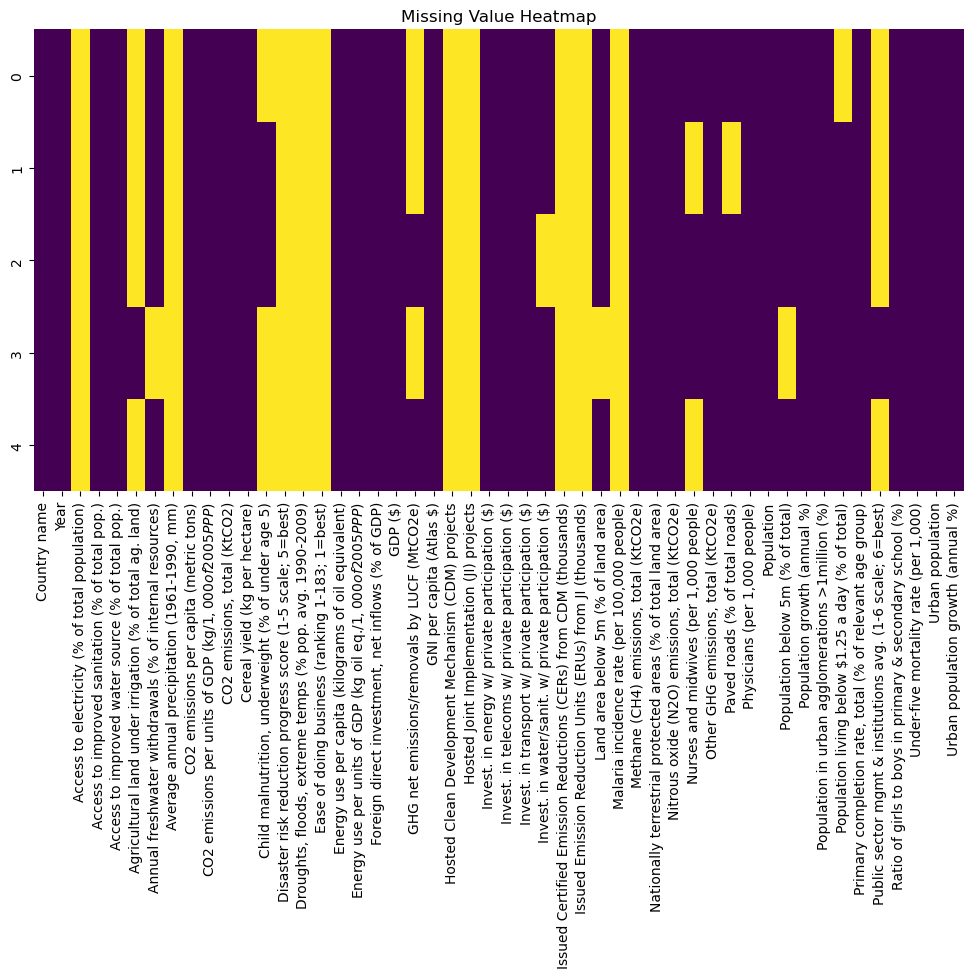

In [12]:
df.info()
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.show()


In [13]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

In [14]:
df_model = df.drop(columns=['Country name'])
df_model.dtypes

Year                                                                  int64
Access to electricity (% of total population)                       float64
Access to improved sanitation (% of total pop.)                     float64
Access to improved water source (% of total pop.)                   float64
Agricultural land under irrigation (% of total ag. land)            float64
Annual freshwater withdrawals (% of internal resources)             float64
Average annual precipitation (1961-1990, mm)                        float64
CO2 emissions per capita (metric tons)                              float64
CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)            float64
CO2 emissions, total (KtCO2)                                        float64
Cereal yield (kg per hectare)                                       float64
Child malnutrition, underweight (% of under age 5)                  float64
Disaster risk reduction progress score (1-5 scale; 5=best)          float64
Droughts, fl

In [15]:
co2_columns = [col for col in df_model.columns if 'CO2' in col.upper()]
print("CO₂-related columns:", co2_columns)
target_column = co2_columns[0]  

CO₂-related columns: ['CO2 emissions per capita (metric tons)', 'CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)', 'CO2 emissions, total (KtCO2)', 'GHG net emissions/removals by LUCF (MtCO2e)', 'Methane (CH4) emissions, total (KtCO2e)', 'Nitrous oxide (N2O) emissions, total (KtCO2e)', 'Other GHG emissions, total (KtCO2e)']


In [16]:
df_model = df_model.dropna(subset=[target_column])
print("After dropping missing target values:", df_model.shape)

After dropping missing target values: (5, 49)


In [17]:
X = df_model.drop(columns=[target_column, 'Year']) 
y = df_model[target_column]

In [18]:
X = X.fillna(X.mean())
print("Any nulls left in features?", X.isnull().values.any())

Any nulls left in features? True


In [19]:
import pandas as pd

df_cleaned = pd.read_csv("C:\\Users\\ansla\\OneDrive\\Desktop\\EDUNET\\SHELL\\cleaned_data.csv")
df_cleaned.head(100)  


,Country name,Year,Access to electricity (% of total population),Access to improved sanitation (% of total pop.),Access to improved water source (% of total pop.),Agricultural land under irrigation (% of total ag. land),Annual freshwater withdrawals (% of internal resources),"Average annual precipitation (1961-1990, mm)",CO2 emissions per capita (metric tons),"CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)",...,Population below 5m (% of total),Population growth (annual %),Population in urban agglomerations >1million (%),Population living below $1.25 a day (% of total),"Primary completion rate, total (% of relevant age group)",Public sector mgmt & institutions avg. (1-6 scale; 6=best),Ratio of girls to boys in primary & secondary school (%),"Under-five mortality rate (per 1,000)",Urban population,Urban population growth (annual %)
0,Brazil,2000,NaN,75.0,93.0,NaN,1.09,NaN,1.89,239.30,...,4.88,1.44,37.13,NaN,107.75,NaN,102.86,35.7,1.416334e+08,2.28
1,Colombia,2000,NaN,72.0,91.0,NaN,0.60,NaN,1.46,220.08,...,2.00,1.68,33.74,16.64,95.17,NaN,103.71,26.8,2.866996e+07,2.12
2,Dominican Republic,2000,NaN,79.0,87.0,NaN,16.60,NaN,2.34,404.73,...,2.98,1.57,21.10,4.41,75.50,NaN,104.25,40.6,5.361387e+06,3.05
3,India,2005,NaN,28.0,85.0,32.92,NaN,NaN,1.29,560.58,...,NaN,1.37,12.23,41.64,85.30,3.7,90.16,73.2,3.141453e+08,2.07
4,Poland,2000,NaN,90.0,100.0,NaN,24.46,NaN,7.85,667.52,...,2.49,-0.53,4.33,0.14,95.23,NaN,98.27,9.6,2.372597e+07,-0.46


In [20]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df_cleaned

,Country name,Year,Access to electricity (% of total population),Access to improved sanitation (% of total pop.),Access to improved water source (% of total pop.),Agricultural land under irrigation (% of total ag. land),Annual freshwater withdrawals (% of internal resources),"Average annual precipitation (1961-1990, mm)",CO2 emissions per capita (metric tons),"CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)","CO2 emissions, total (KtCO2)",Cereal yield (kg per hectare),"Child malnutrition, underweight (% of under age 5)",Disaster risk reduction progress score (1-5 scale; 5=best),"Droughts, floods, extreme temps (% pop. avg. 1990-2009)",Ease of doing business (ranking 1-183; 1=best),Energy use per capita (kilograms of oil equivalent),"Energy use per units of GDP (kg oil eq./$1,000 of 2005 PPP $)","Foreign direct investment, net inflows (% of GDP)",GDP ($),GHG net emissions/removals by LUCF (MtCO2e),GNI per capita (Atlas $),Hosted Clean Development Mechanism (CDM) projects,Hosted Joint Implementation (JI) projects,Invest. in energy w/ private participation ($),Invest. in telecoms w/ private participation ($),Invest. in transport w/ private participation ($),Invest. in water/sanit. w/ private participation ($),Issued Certified Emission Reductions (CERs) from CDM (thousands),Issued Emission Reduction Units (ERUs) from JI (thousands),Land area below 5m (% of land area),"Malaria incidence rate (per 100,000 people)","Methane (CH4) emissions, total (KtCO2e)",Nationally terrestrial protected areas (% of total land area),"Nitrous oxide (N2O) emissions, total (KtCO2e)","Nurses and midwives (per 1,000 people)","Other GHG emissions, total (KtCO2e)",Paved roads (% of total roads),"Physicians (per 1,000 people)",Population,Population below 5m (% of total),Population growth (annual %),Population in urban agglomerations >1million (%),Population living below $1.25 a day (% of total),"Primary completion rate, total (% of relevant age group)",Public sector mgmt & institutions avg. (1-6 scale; 6=best),Ratio of girls to boys in primary & secondary school (%),"Under-five mortality rate (per 1,000)",Urban population,Urban population growth (annual %)
0,Brazil,2000,NaN,75.0,93.0,NaN,1.09,NaN,1.89,239.30,330125.34,2661.3,NaN,NaN,NaN,NaN,1084.48,137.12,5.08,6.447018e+11,NaN,3860.0,NaN,NaN,8.587690e+09,1.010720e+10,1.373000e+09,711280000.0,NaN,NaN,1.21,NaN,345192.9,18.71,166811.2,3.84,7621.1,5.50,1.15,1.744254e+08,4.88,1.44,37.13,NaN,107.75,NaN,102.86,35.7,1.416334e+08,2.28
1,Colombia,2000,NaN,72.0,91.0,NaN,0.60,NaN,1.46,220.08,57923.93,3646.0,4.9,NaN,NaN,NaN,673.56,101.76,2.43,1.003638e+11,NaN,2350.0,NaN,NaN,8.190000e+07,1.105000e+08,1.047700e+09,42000000.0,NaN,NaN,0.94,NaN,55555.2,20.40,20912.0,NaN,28.4,NaN,1.32,3.976417e+07,2.00,1.68,33.74,16.64,95.17,NaN,103.71,26.8,2.866996e+07,2.12
2,Dominican Republic,2000,NaN,79.0,87.0,NaN,16.60,NaN,2.34,404.73,20117.16,4138.7,3.5,NaN,NaN,NaN,908.34,157.02,3.97,2.399666e+10,-18.794100,2620.0,NaN,NaN,5.773000e+08,0.000000e+00,4.989000e+08,NaN,NaN,NaN,4.14,NaN,5770.6,22.13,2081.4,1.84,0.0,49.40,1.88,8.591967e+06,2.98,1.57,21.10,4.41,75.50,NaN,104.25,40.6,5.361387e+06,3.05
3,India,2005,NaN,28.0,85.0,32.92,NaN,NaN,1.29,560.58,1411127.61,2411.5,NaN,NaN,NaN,NaN,491.43,213.69,0.91,8.340358e+11,NaN,750.0,NaN,NaN,9.098300e+08,5.665750e+09,1.526510e+09,0.0,NaN,NaN,NaN,NaN,583977.6,5.33,212927.3,1.30,8433.1,46.99,0.60,1.094583e+09,NaN,1.37,12.23,41.64,85.30,3.7,90.16,73.2,3.141453e+08,2.07
4,Poland,2000,NaN,90.0,100.0,NaN,24.46,NaN,7.85,667.52,301691.42,2534.7,NaN,NaN,NaN,NaN,2317.48,197.18,5.45,1.712761e+11,-12.723483,4590.0,NaN,NaN,4.533000e+08,6.796530e+09,5.365000e+08,20200000.0,NaN,NaN,1.68,NaN,69288.9,21.83,29094.9,NaN,1376.8,68.30,2.20,3.845376e+07,2.49,-0.53,4.33,0.14,95.23,NaN,98.27,9.6,2.372597e+07,-0.46


WEEK2 PROGRESS        

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [33]:
df = pd.read_csv("C:\\Users\\ansla\\OneDrive\\Desktop\\EDUNET\\SHELL\\cleaned_data.csv")
df.head()

,Country name,Year,Access to electricity (% of total population),Access to improved sanitation (% of total pop.),Access to improved water source (% of total pop.),Agricultural land under irrigation (% of total ag. land),Annual freshwater withdrawals (% of internal resources),"Average annual precipitation (1961-1990, mm)",CO2 emissions per capita (metric tons),"CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)",...,Population below 5m (% of total),Population growth (annual %),Population in urban agglomerations >1million (%),Population living below $1.25 a day (% of total),"Primary completion rate, total (% of relevant age group)",Public sector mgmt & institutions avg. (1-6 scale; 6=best),Ratio of girls to boys in primary & secondary school (%),"Under-five mortality rate (per 1,000)",Urban population,Urban population growth (annual %)
0,Brazil,2000,NaN,75.0,93.0,NaN,1.09,NaN,1.89,239.30,...,4.88,1.44,37.13,NaN,107.75,NaN,102.86,35.7,1.416334e+08,2.28
1,Colombia,2000,NaN,72.0,91.0,NaN,0.60,NaN,1.46,220.08,...,2.00,1.68,33.74,16.64,95.17,NaN,103.71,26.8,2.866996e+07,2.12
2,Dominican Republic,2000,NaN,79.0,87.0,NaN,16.60,NaN,2.34,404.73,...,2.98,1.57,21.10,4.41,75.50,NaN,104.25,40.6,5.361387e+06,3.05
3,India,2005,NaN,28.0,85.0,32.92,NaN,NaN,1.29,560.58,...,NaN,1.37,12.23,41.64,85.30,3.7,90.16,73.2,3.141453e+08,2.07
4,Poland,2000,NaN,90.0,100.0,NaN,24.46,NaN,7.85,667.52,...,2.49,-0.53,4.33,0.14,95.23,NaN,98.27,9.6,2.372597e+07,-0.46


In [34]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")
print("Column names in the dataset:")
print(df.columns.tolist())

Dataset contains 5 rows and 50 columns.

Column names in the dataset:
['Country name', 'Year', 'Access to electricity (% of total population)', 'Access to improved sanitation (% of total pop.)', 'Access to improved water source (% of total pop.)', 'Agricultural land under irrigation (% of total ag. land)', 'Annual freshwater withdrawals (% of internal resources)', 'Average annual precipitation (1961-1990, mm)', 'CO2 emissions per capita (metric tons)', 'CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)', 'CO2 emissions, total (KtCO2)', 'Cereal yield (kg per hectare)', 'Child malnutrition, underweight (% of under age 5)', 'Disaster risk reduction progress score (1-5 scale; 5=best)', 'Droughts, floods, extreme temps (% pop. avg. 1990-2009)', 'Ease of doing business (ranking 1-183; 1=best)', 'Energy use per capita (kilograms of oil equivalent)', 'Energy use per units of GDP (kg oil eq./$1,000 of 2005 PPP $)', 'Foreign direct investment, net inflows (% of GDP)', 'GDP ($)', 'GHG net 

In [35]:
print("Data types of each column:\n")
print(df.dtypes)
print("\nSummary statistics:\n")
df.describe()

Data types of each column:

Country name                                                         object
Year                                                                  int64
Access to electricity (% of total population)                       float64
Access to improved sanitation (% of total pop.)                     float64
Access to improved water source (% of total pop.)                   float64
Agricultural land under irrigation (% of total ag. land)            float64
Annual freshwater withdrawals (% of internal resources)             float64
Average annual precipitation (1961-1990, mm)                        float64
CO2 emissions per capita (metric tons)                              float64
CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)            float64
CO2 emissions, total (KtCO2)                                        float64
Cereal yield (kg per hectare)                                       float64
Child malnutrition, underweight (% of under age 5)          

,Year,Access to electricity (% of total population),Access to improved sanitation (% of total pop.),Access to improved water source (% of total pop.),Agricultural land under irrigation (% of total ag. land),Annual freshwater withdrawals (% of internal resources),"Average annual precipitation (1961-1990, mm)",CO2 emissions per capita (metric tons),"CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)","CO2 emissions, total (KtCO2)",...,Population below 5m (% of total),Population growth (annual %),Population in urban agglomerations >1million (%),Population living below $1.25 a day (% of total),"Primary completion rate, total (% of relevant age group)",Public sector mgmt & institutions avg. (1-6 scale; 6=best),Ratio of girls to boys in primary & secondary school (%),"Under-five mortality rate (per 1,000)",Urban population,Urban population growth (annual %)
count,5.000000,0.0,5.000000,5.000000,1.00,4.00000,0.0,5.00000,5.000000,5.000000e+00,...,4.000000,5.000000,5.000000,4.000000,5.00000,1.0,5.000000,5.000000,5.000000e+00,5.000000
mean,2001.000000,NaN,68.800000,91.200000,32.92,10.68750,NaN,2.96600,418.442000,4.241971e+05,...,3.087500,1.106000,21.706000,15.707500,91.79000,3.7,99.850000,37.180000,1.027072e+08,1.812000
std,2.236068,NaN,23.805462,5.848077,NaN,11.81114,NaN,2.76044,196.131601,5.690619e+05,...,1.260195,0.922296,13.917652,18.648902,12.09818,NaN,5.909996,23.343779,1.298240e+08,1.329951
min,2000.000000,NaN,28.000000,85.000000,32.92,0.60000,NaN,1.29000,220.080000,2.011716e+04,...,2.000000,-0.530000,4.330000,0.140000,75.50000,3.7,90.160000,9.600000,5.361387e+06,-0.460000
25%,2000.000000,NaN,72.000000,87.000000,32.92,0.96750,NaN,1.46000,239.300000,5.792393e+04,...,2.367500,1.370000,12.230000,3.342500,85.30000,3.7,98.270000,26.800000,2.372597e+07,2.070000
50%,2000.000000,NaN,75.000000,91.000000,32.92,8.84500,NaN,1.89000,404.730000,3.016914e+05,...,2.735000,1.440000,21.100000,10.525000,95.17000,3.7,102.860000,35.700000,2.866996e+07,2.120000
75%,2000.000000,NaN,79.000000,93.000000,32.92,18.56500,NaN,2.34000,560.580000,3.301253e+05,...,3.455000,1.570000,33.740000,22.890000,95.23000,3.7,103.710000,40.600000,1.416334e+08,2.280000
max,2005.000000,NaN,90.000000,100.000000,32.92,24.46000,NaN,7.85000,667.520000,1.411128e+06,...,4.880000,1.680000,37.130000,41.640000,107.75000,3.7,104.250000,73.200000,3.141453e+08,3.050000


In [36]:
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage (%)': missing_percent
}).sort_values(by='Missing Values', ascending=False)
missing_df[missing_df['Missing Values'] > 0]

,Missing Values,Percentage (%)
Hosted Clean Development Mechanism (CDM) projects,5,100.0
"Average annual precipitation (1961-1990, mm)",5,100.0
Ease of doing business (ranking 1-183; 1=best),5,100.0
"Droughts, floods, extreme temps (% pop. avg. 1990-2009)",5,100.0
Disaster risk reduction progress score (1-5 scale; 5=best),5,100.0
Hosted Joint Implementation (JI) projects,5,100.0
Issued Certified Emission Reductions (CERs) from CDM (thousands),5,100.0
Issued Emission Reduction Units (ERUs) from JI (thousands),5,100.0
"Malaria incidence rate (per 100,000 people)",5,100.0
Access to electricity (% of total population),5,100.0


In [37]:
top_emitters = df.groupby('Country name')['CO2 emissions, total (KtCO2)'].sum().sort_values(ascending=False)
top_emitters.head(10)

Country name
India                 1411127.61
Brazil                 330125.34
Poland                 301691.42
Colombia                57923.93
Dominican Republic      20117.16
Name: CO2 emissions, total (KtCO2), dtype: float64

C:\Users\ansla\AppData\Local\Temp\ipykernel_14964\2884741550.py:12: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\ansla\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


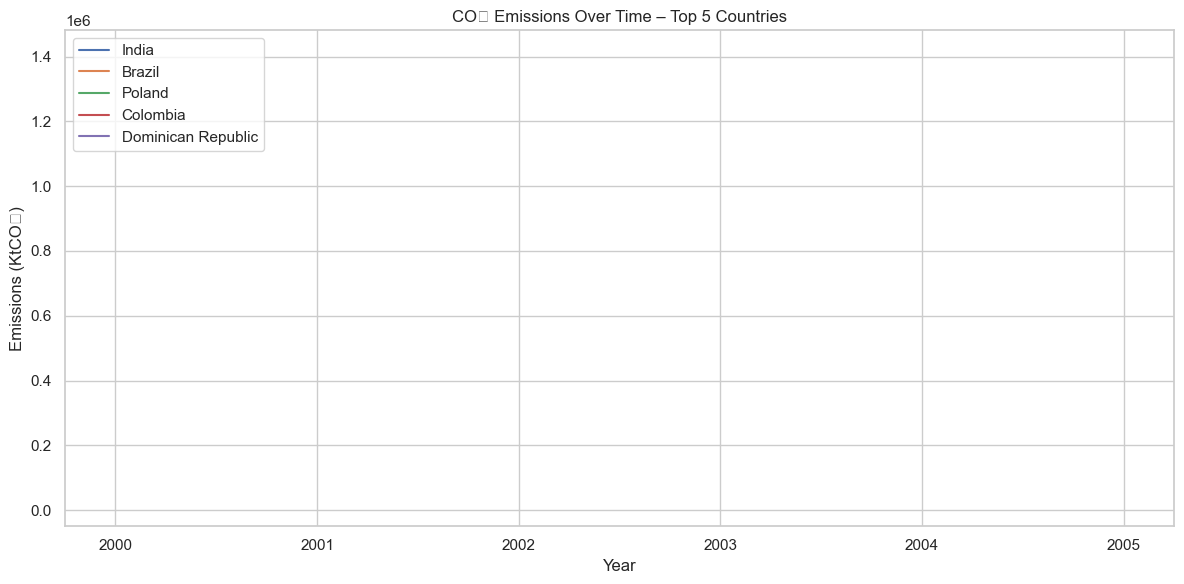

In [38]:
top5_countries = top_emitters.head(5).index.tolist()
plt.figure(figsize=(12, 6))
for country in top5_countries:
    country_data = df[df['Country name'] == country]
    plt.plot(country_data['Year'], country_data['CO2 emissions, total (KtCO2)'],
             label=country)
plt.title('CO₂ Emissions Over Time – Top 5 Countries')
plt.xlabel('Year')
plt.ylabel('Emissions (KtCO₂)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [43]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'

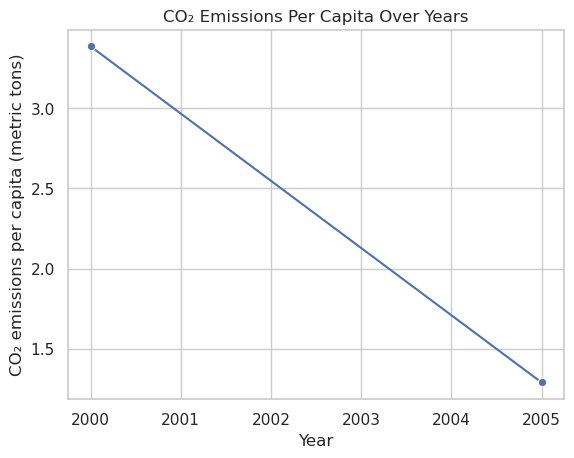

In [45]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'
sns.lineplot(data=yearly_avg, x='Year', y='CO2 emissions per capita (metric tons)', marker='o')
plt.title('CO₂ Emissions Per Capita Over Years')
plt.xlabel('Year')
plt.ylabel('CO₂ emissions per capita (metric tons)')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Average Global CO2 Emissions Per Capita Over the Years')

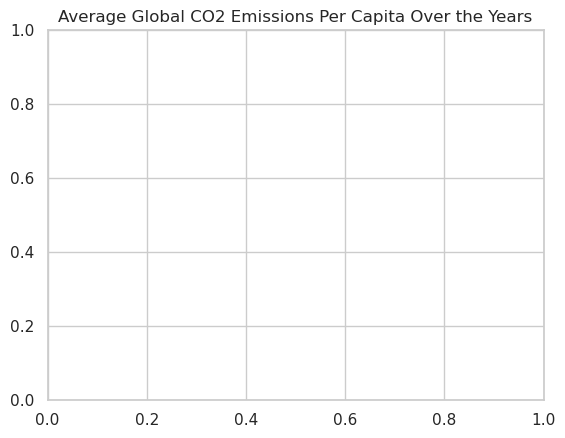

In [46]:
plt.title('Average Global CO2 Emissions Per Capita Over the Years')

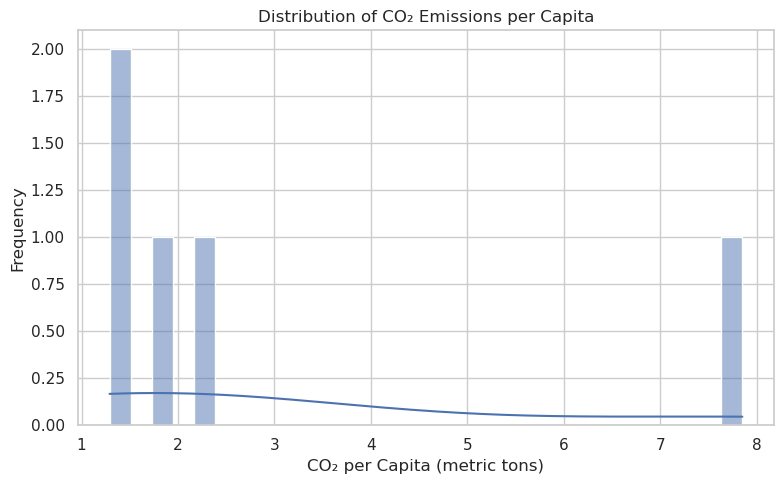

In [48]:
plt.figure(figsize=(8, 5))
sns.histplot(df['CO2 emissions per capita (metric tons)'].dropna(), bins=30, kde=True)
plt.title('Distribution of CO₂ Emissions per Capita')
plt.xlabel('CO₂ per Capita (metric tons)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

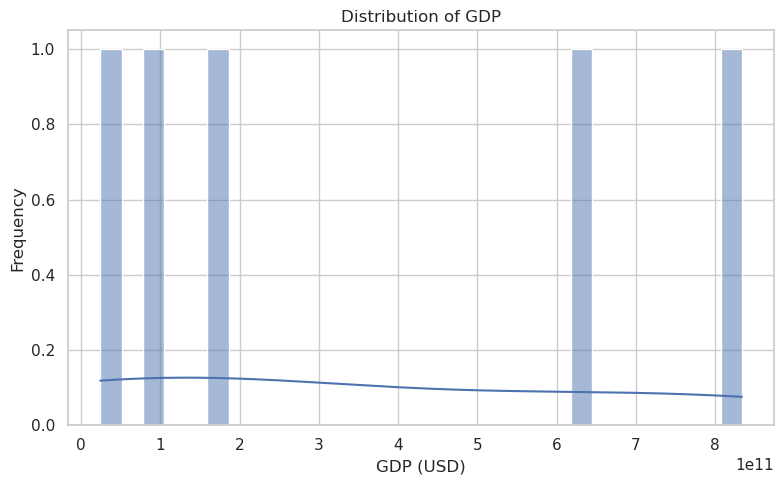

In [50]:
plt.figure(figsize=(8, 5))
sns.histplot(df['GDP ($)'].dropna(), bins=30, kde=True)
plt.title('Distribution of GDP')
plt.xlabel('GDP (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

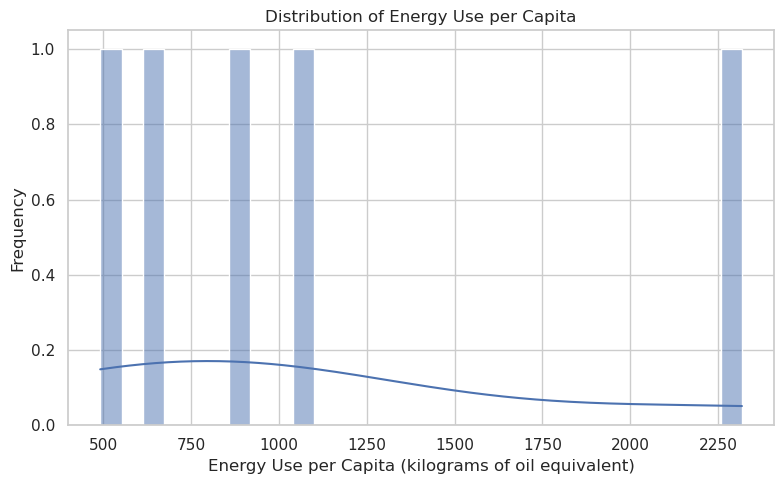

In [52]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Energy use per capita (kilograms of oil equivalent)'].dropna(), bins=30, kde=True)
plt.title('Distribution of Energy Use per Capita')
plt.xlabel('Energy Use per Capita (kilograms of oil equivalent)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

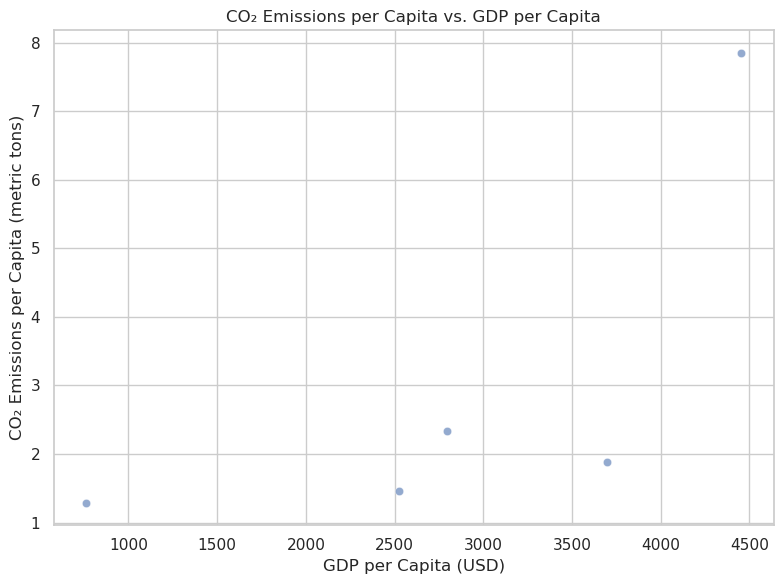

In [54]:
if 'GDP per capita (current US$)' not in df.columns and 'GDP ($)' in df.columns and 'Population' in df.columns:
    df['GDP per capita (current US$)'] = df['GDP ($)'] / df['Population']
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='GDP per capita (current US$)',
    y='CO2 emissions per capita (metric tons)',
    alpha=0.6
)
plt.title('CO₂ Emissions per Capita vs. GDP per Capita')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('CO₂ Emissions per Capita (metric tons)')
plt.grid(True)
plt.tight_layout()
plt.show()

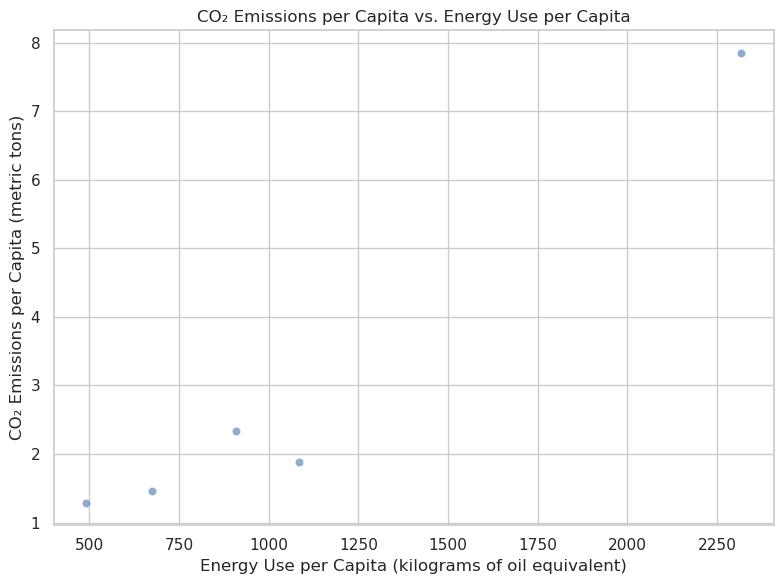

In [56]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Energy use per capita (kilograms of oil equivalent)',
    y='CO2 emissions per capita (metric tons)',
    alpha=0.6
)
plt.title('CO₂ Emissions per Capita vs. Energy Use per Capita')
plt.xlabel('Energy Use per Capita (kilograms of oil equivalent)')
plt.ylabel('CO₂ Emissions per Capita (metric tons)')
plt.grid(True)
plt.tight_layout()
plt.show()

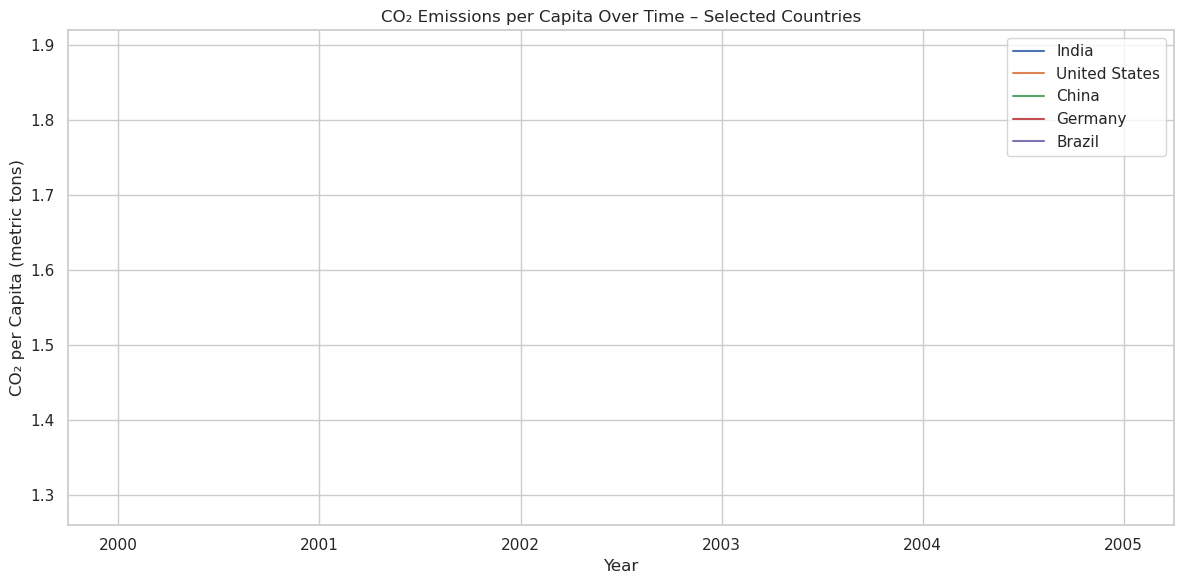

In [57]:
selected_countries = ['India', 'United States', 'China', 'Germany', 'Brazil']
plt.figure(figsize=(12, 6))

for country in selected_countries:
    country_data = df[df['Country name'] == country]
    plt.plot(country_data['Year'], country_data['CO2 emissions per capita (metric tons)'],
             label=country)
plt.title('CO₂ Emissions per Capita Over Time – Selected Countries')
plt.xlabel('Year')
plt.ylabel('CO₂ per Capita (metric tons)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\ansla\AppData\Local\Temp\ipykernel_14964\3144444735.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_emissions.head(10).values, y=avg_emissions.head(10).index, palette='Reds_r')


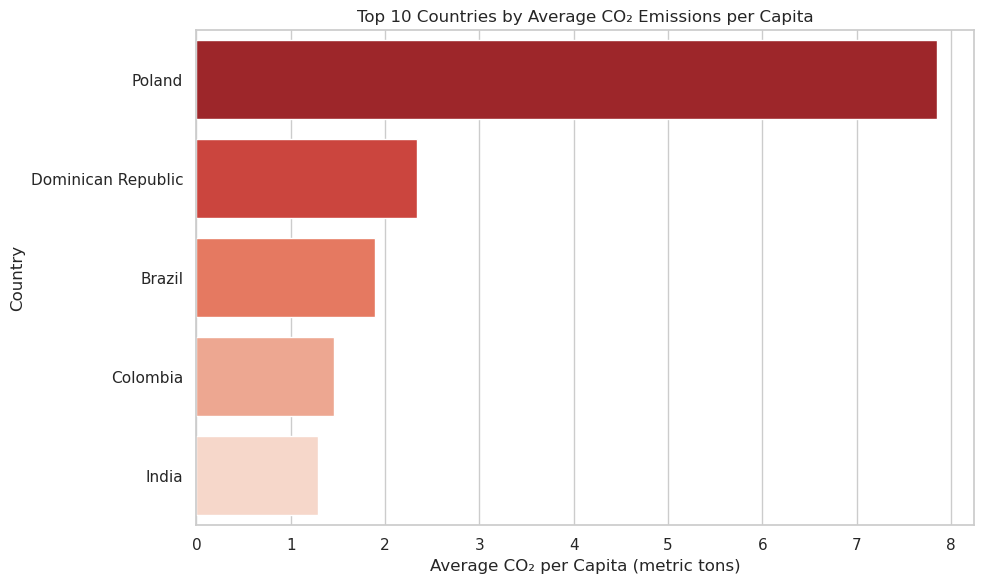

In [58]:
avg_emissions = df.groupby('Country name')['CO2 emissions per capita (metric tons)'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_emissions.head(10).values, y=avg_emissions.head(10).index, palette='Reds_r')
plt.title('Top 10 Countries by Average CO₂ Emissions per Capita')
plt.xlabel('Average CO₂ per Capita (metric tons)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

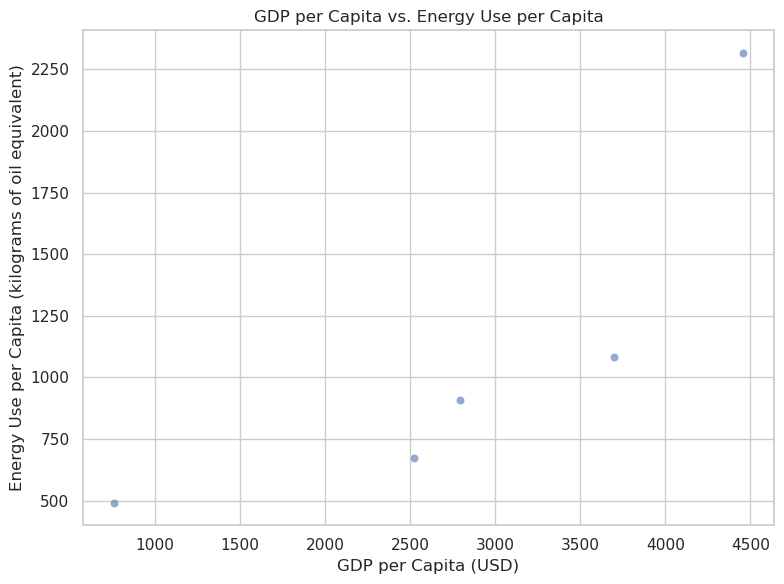

In [60]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='GDP per capita (current US$)',
    y='Energy use per capita (kilograms of oil equivalent)',
    alpha=0.6
)
plt.title('GDP per Capita vs. Energy Use per Capita')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Energy Use per Capita (kilograms of oil equivalent)')
plt.grid(True)
plt.tight_layout()
plt.show()

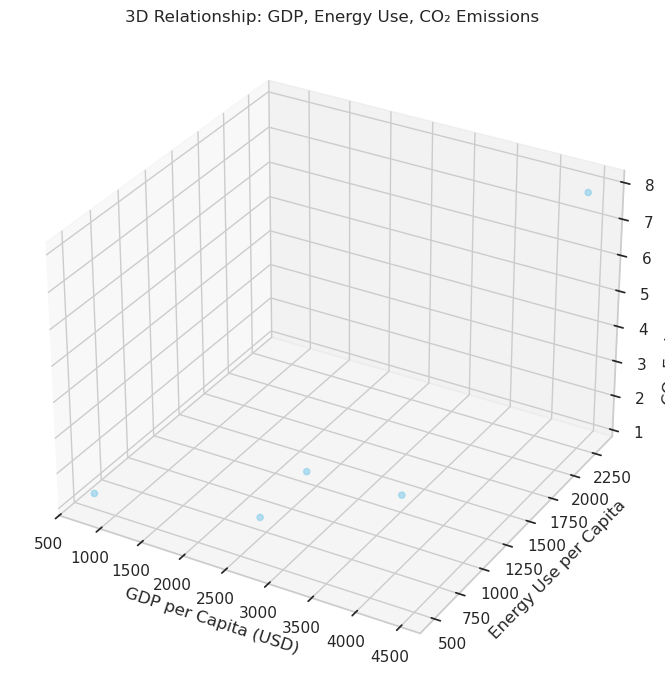

In [62]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
df_3d = df[['GDP per capita (current US$)', 'Energy use per capita (kilograms of oil equivalent)',
            'CO2 emissions per capita (metric tons)']].dropna()
ax.scatter(
    df_3d['GDP per capita (current US$)'],
    df_3d['Energy use per capita (kilograms of oil equivalent)'],
    df_3d['CO2 emissions per capita (metric tons)'],
    c='skyblue', alpha=0.6
)
ax.set_xlabel('GDP per Capita (USD)')
ax.set_ylabel('Energy Use per Capita')
ax.set_zlabel('CO₂ Emissions per Capita')
ax.set_title('3D Relationship: GDP, Energy Use, CO₂ Emissions')
plt.tight_layout()
plt.show()